In [6]:
!pip install finance-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 2.4 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [10]:
import FinanceDataReader as fdr

gex = fdr.DataReader('095700')

In [11]:
gex

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2009-09-15,11075,11547,9423,9842,4338570,NaN
2009-09-16,9841,10767,9714,9769,3305428,-0.007417
2009-09-17,9986,10331,9659,9769,1211170,0.000000
2009-09-18,9877,9931,8915,8916,1168239,-0.087317
2009-09-21,8915,9859,8824,9134,1421813,0.024450
...,...,...,...,...,...,...
2024-06-26,6340,6340,6240,6300,47121,-0.004739
2024-06-27,6490,6670,6270,6300,158623,0.000000
2024-06-28,6310,6390,6190,6210,58637,-0.014286


In [13]:
gex.index

DatetimeIndex(['2009-09-15', '2009-09-16', '2009-09-17', '2009-09-18',
               '2009-09-21', '2009-09-22', '2009-09-23', '2009-09-24',
               '2009-09-25', '2009-09-28',
               ...
               '2024-06-19', '2024-06-20', '2024-06-21', '2024-06-24',
               '2024-06-25', '2024-06-26', '2024-06-27', '2024-06-28',
               '2024-07-01', '2024-07-02'],
              dtype='datetime64[ns]', name='Date', length=3651, freq=None)

In [14]:
gex['Year'] = gex.index.year
gex['Month'] = gex.index.month
gex['Day'] = gex.index.day

In [16]:
gex.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
2009-09-15,11075,11547,9423,9842,4338570,NaN,2009,9,15
2009-09-16,9841,10767,9714,9769,3305428,-0.007417,2009,9,16
2009-09-17,9986,10331,9659,9769,1211170,0.000000,2009,9,17
2009-09-18,9877,9931,8915,8916,1168239,-0.087317,2009,9,18
2009-09-21,8915,9859,8824,9134,1421813,0.024450,2009,9,21


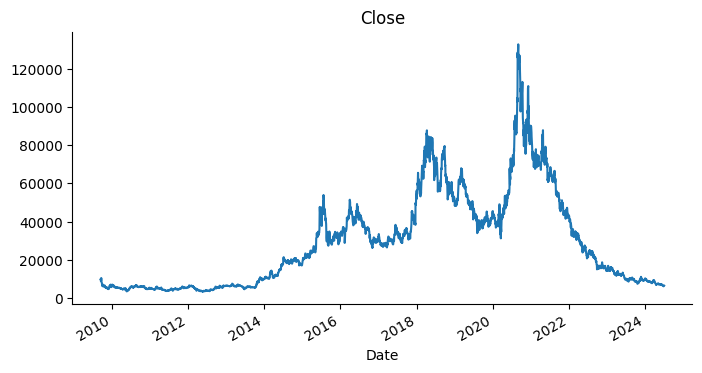

In [17]:
from matplotlib import pyplot as plt

gex['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

# Scale the columns and replace them in the DataFrame
gex[scale_cols] = scaler.fit_transform(gex[scale_cols])

# Display the scaled DataFrame
print(gex)

                Open      High       Low     Close    Volume    Change  Year  \
Date                                                                           
2009-09-15  0.059092  0.060339  0.047345  0.049876  0.354509       NaN  2009   
2009-09-16  0.049642  0.054552  0.049612  0.049313  0.270009 -0.007417  2009   
2009-09-17  0.050752  0.051318  0.049184  0.049313  0.098720  0.000000  2009   
2009-09-18  0.049918  0.048351  0.043386  0.042724  0.095209 -0.087317  2009   
2009-09-21  0.042550  0.047817  0.042677  0.044408  0.115949  0.024450  2009   
...              ...       ...       ...       ...       ...       ...   ...   
2024-06-26  0.022830  0.021713  0.022543  0.022517  0.003513 -0.004739  2024   
2024-06-27  0.023979  0.024161  0.022776  0.022517  0.012633  0.000000  2024   
2024-06-28  0.022600  0.022084  0.022153  0.021821  0.004455 -0.014286  2024   
2024-07-01  0.022523  0.024012  0.022776  0.024216  0.019564  0.049919  2024   
2024-07-02  0.024668  0.025051  0.023478

In [19]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_test, y_train, y_test = train_test_split(gex.drop('Close', axis=1), gex['Close'], test_size=0.2, random_state=42)

# Display the resulting splits
print("X_train:\n", x_train)

X_train:
                 Open      High       Low    Volume    Change  Year  Month  Day
Date                                                                          
2021-12-15  0.335279  0.328123  0.330471  0.024284 -0.012287  2021     12   15
2021-10-27  0.365874  0.353990  0.365559  0.009040 -0.011346  2021     10   27
2018-12-18  0.355305  0.357759  0.355936  0.013820  0.007170  2018     12   18
2015-06-01  0.224576  0.235984  0.221522  0.011951  0.062230  2015      6    1
2020-12-15  0.603385  0.606145  0.603257  0.254637 -0.076542  2020     12   15
...              ...       ...       ...       ...       ...   ...    ...  ...
2014-04-01  0.057423  0.057920  0.055971  0.006311  0.033428  2014      4    1
2014-12-02  0.104293  0.109238  0.106206  0.008238 -0.057113  2014     12    2
2013-02-26  0.025449  0.024784  0.025987  0.002451  0.010925  2013      2   26
2023-11-29  0.054000  0.052275  0.051919  0.040433 -0.035577  2023     11   29
2022-07-25  0.155328  0.151403  0.154167  

In [20]:
import tensorflow as tf

In [29]:
def window_dataset(series, window_size, batch_size, shuffle):
  series = tf.expand_dims(series, axis=1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size +1))
  if shuffle:
    ds = ds.shuffle(1000)
  ds = ds.map(lambda w: (w[:-1], w[-1]))
  return ds.batch(batch_size).prefetch(1)

In [30]:
WINDOW_SIZE = 20
BATCH_SIZE = 32

In [31]:
train_data = window_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = window_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [32]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import Huber

model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

model.compile(optimizer=Adam(learning_rate=0.005), loss=Huber(), metrics=['mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)




In [34]:
import os

filename = os.path.join('tmp', 'checkpointer.ckpt')
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=filename,
    save_weights_only=True,
    monitor='val_loss',
    verbose=1)

In [35]:
model.fit(train_data, epochs=100, validation_data=test_data, callbacks=[checkpoint, early_stopping])

Epoch 1/100
     91/Unknown - 6s 6ms/step - loss: 0.0191 - mse: 0.0383
Epoch 1: saving model to tmp/checkpointer.ckpt
91/91 [==============================] - 7s 15ms/step - loss: 0.0191 - mse: 0.0383 - val_loss: 0.0191 - val_mse: 0.0382
Epoch 2/100
86/91 [===========================>..] - ETA: 0s - loss: 0.0188 - mse: 0.0377
Epoch 2: saving model to tmp/checkpointer.ckpt
91/91 [==============================] - 1s 7ms/step - loss: 0.0187 - mse: 0.0373 - val_loss: 0.0184 - val_mse: 0.0368
Epoch 3/100
85/91 [===========================>..] - ETA: 0s - loss: 0.0185 - mse: 0.0371
Epoch 3: saving model to tmp/checkpointer.ckpt
91/91 [==============================] - 1s 7ms/step - loss: 0.0183 - mse: 0.0367 - val_loss: 0.0183 - val_mse: 0.0367
Epoch 4/100
87/91 [===========================>..] - ETA: 0s - loss: 0.0183 - mse: 0.0366
Epoch 4: saving model to tmp/checkpointer.ckpt
91/91 [==============================] - 1s 6ms/step - loss: 0.0184 - mse: 0.0369 - val_loss: 0.0190 - val_mse: 0

In [36]:
model.load_weights(filename)

In [37]:
pred = model.predict(test_data)

23/23 [==============================] - 0s 3ms/step


In [45]:
pred.shape

(711, 1)

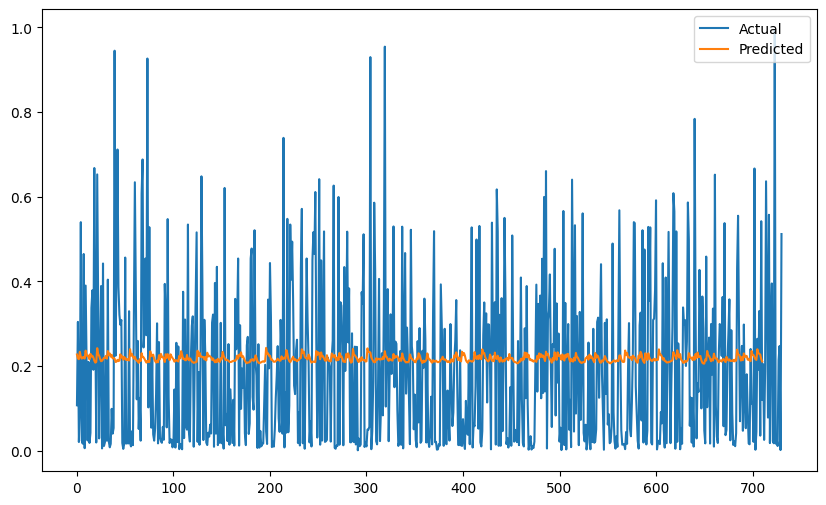

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(np.asarray(y_test), label='Actual')
plt.plot(pred, label='Predicted')
plt.legend()
plt.show()